In [1]:
# from blueocean_dataaccess import DataCommand
# from blueocean_api import DataAccessApi
from BlueOcean import DataAccessApi
from tshistory.api import timeseries
import pandas as pd
from datetime import datetime as dt
# from ag_data_access.blueocean_access import get_data
import requests, warnings

from ag_datagenic_rest_client import DataGenic
d = DataGenic.create_from_environment()

tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

In [2]:
# dg test
modelid = "model://HE_UKASS_REL/EU.NG.TTF.HE.ASS.M01/MID"

from_date = dt(2021, 7, 29)
to_date = dt(2021, 7, 30)

c = DataGenic.create_from_environment()

df=c.get_time_series(model_url=modelid,from_date=from_date, to_date=to_date)
print((f"Received {len(df)} records" ))
print("Displaying the Head")
print(df.head())

Received 2 records
Displaying the Head
             PRICE
Time              
2021-07-29  41.238
2021-07-30  40.550


In [2]:
# def bo_get_data(query):
#     api = DataAccessApi()
#     body = DataCommand(query=query)
#     response = api.generic_data_get_generic_data(body)
#     data = pd.DataFrame.from_records(response)
#     return data

def bo_get_data(query):
    data = DataAccessApi.GetDataframe(query)
    return data

# def bo_get_data(query):
#     warnings.simplefilter('ignore', requests.packages.urllib3.exceptions.InsecureRequestWarning)
#     df_results = get_data(sql=query)
#     return df_results


In [3]:
def aggregate_daily_kbd(df):
    df.set_index(pd.to_datetime(df['date']))
    df_grouped = df.resample('D').sum().astype(float)
    df_grouped.index = df_grouped.index.tz_localize(None)
    return df_grouped['volume']/1000


def aggregate_monthly_kbd(df):
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df_grouped = df.resample('MS').sum().astype(float)
    df_grouped['volume'] = df_grouped['volume']/(df_grouped.index.daysinmonth*1000)
    df_grouped.index = df_grouped.index.tz_localize(None)
    return df_grouped['volume']


In [6]:
oecd_exp = bo_get_data(russian_qry)

DLL load failed: The specified procedure could not be found.
Error detected, attempt 2. Resetting cache and encryption key
DLL load failed: The specified procedure could not be found.


RetryError: RetryError[<Future at 0x1a7faf82128 state=finished raised ImportError>]

In [29]:
oecd_exp_m = aggregate_monthly_kbd(oecd_exp)

C:\Users\SYEDAH~1\AppData\Local\Temp/ipykernel_28244/724630620.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.resample('MS').sum().astype(float)


In [5]:
oecd_europe = ('Slovenia','Poland','Turkey','Denmark','Estonia','Finland','Iceland','Ireland','Norway','Sweden','United Kingdom','Albania','Greece','Italy','Portugal','Spain','Belgium','France','Germany','Netherlands', 'Lithuania')
COUNTRY_LIST = ['United States', 'Canada', 'Mexico','Nigeria', 'Angola', 'Brazil', 'Guyana', 'Colombia', 'Libya', 'Algeria', 'Tunisia', 'Saudi Arabia','United Arab Emirates', 'Iraq', 'Kuwait', 'Iran', 'Egypt','Russian Federation']
SUBCONTINENT_LIST = ['Western Africa', 'South America', 'Northern America']

oecd_exports_query = f'''select start date, sum(cargo_origin_barrels_split_by_product) volume from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
where (origin_country_name in ('United Kingdom', 'Norway') and  zone_origin_name != 'Ceyhan')
and continent_destination_name in ('Asia', 'America', 'Africa', 'Oceania')
and LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
group by start
order by start desc
'''

oecd_exports_query_old = f'''select start date, sum(cargo_origin_barrels_split_by_product) volume from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
where (origin_country_name in {oecd_europe} and  zone_origin_name != 'Ceyhan')
and destination_country_name not in {oecd_europe}
and LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
group by start
order by start desc
'''

oecd_exports_eu_query = f'''select * from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
where (origin_country_name in {oecd_europe} and  zone_origin_name != 'Ceyhan')
and destination_country_name not in {oecd_europe}
and continent_destination_name = 'Europe'
and LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
order by start desc
'''

exports_table_qry = f'''select * from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
where (origin_country_name in {oecd_europe} and  zone_origin_name != 'Ceyhan')
and destination_country_name not in {oecd_europe}
and LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
and start > '2023-01-31' and start < '2023-03-01'
order by start desc
'''

qry = """select * from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
where LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
and oil_kpler_kplertradesversioned.continent_origin_name = 'Europe' limit 50"""

ceyhan_qry = """select start date, sum(cargo_origin_barrels_split_by_product) volume from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
where zone_origin_name = 'Ceyhan'
and LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
group by start
order by start desc"""

russian_qry_table = """select * from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
where (origin_country_name = 'Russian Federation' and closest_ancestor_grade !='CPC')
and destination_country_name in ('Slovenia','Poland','Turkey','Denmark','Estonia','Finland','Iceland','Ireland','Norway','Sweden','United Kingdom','Albania','Greece','Italy','Portugal','Spain','Belgium','France','Germany','Netherlands', 'Lithuania')
and LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
and end >'2022-01-01'"""

russian_qry = f'''select end date, sum(cargo_origin_barrels_split_by_product) volume from hive_metastore.dataengineering.oil_kpler_kplertradesversioned 
    where (origin_country_name = 'Russian Federation' and closest_ancestor_grade not in ('CPC', 'CPC Kazakhstan'))
    and destination_country_name in {oecd_europe}
    and LoadTimeStamp = (select max(LoadTimeStamp) from hive_metastore.dataengineering.oil_kpler_kplertradesversioned)
    group by end
    order by end desc
    '''

In [5]:
short_cols = [
    'trade_id',
    'shipment_id',
    'status',
    'vessel_imo',
    "vessel_name",
    'vessel_name_2',
    'vessel_name_3',
    'closest_ancestor_group',
    "closest_ancestor_product",
    "closest_ancestor_grade",
    'closest_ancestor_grade_api',
    'closest_ancestor_grade_sulfur',
    'cargo_origin_barrels_split_by_product',
    "start",
    "end",
    "origin_location_name",
    'installation_origin_name',
    'origin_country_name',
    'zone_origin_name',
    'origin_subcontinent_name',
    'continent_origin_name',
    # 'next_forecasted_origin_location_name',
    # 'next_forecasted_origin_eta',
    'initial_seller_name',
    'charterer_name',
    "destination_location_name",
    # 'next_forecasted_destination_location_name',
    # 'next_forecasted_destination_location_eta',
    'installation_destination_name',
    'destination_country_name',
    'zone_destination_name',
    'destination_subcontinent_name',
    'continent_destination_name',
    'final_buyer_name',
    'origin_eta_source',
    'destination_eta_source',
    'cargo_sources'
]

In [6]:
russia_22 = bo_get_data(russian_qry_table)
russia_22['end'] = pd.to_datetime(russia_22['end'])
feb_view = russia_22[short_cols]
# feb_view.to_csv('russia_exports.csv')

c:\conda\envs\saturn\lib\site-packages\BlueOcean\DataAccessApi.py:28: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df.to_csv(file, mode='a', header=file.tell() == 0, index=False,line_terminator='\n', encoding=encoding)


In [13]:
russian_dests = russia_22.groupby(['destination_country_name', 'end'])['cargo_origin_barrels_split_by_product'].sum().unstack(level=0)
# russian_dests_m = russian_dests.resample('MS').sum()
russian_dests_m = round(russian_dests.resample('d').sum().resample('MS').mean()/1000, 0)
russian_dests_m['total'] = russian_dests_m.sum(axis=1)

In [14]:
russian_dests_m

destination_country_name   Finland  France  Germany  Greece  Italy  Lithuania  \
end                                                                             
2022-01-01 00:00:00+00:00    117.0   296.0    134.0   163.0  540.0      166.0   
2022-02-01 00:00:00+00:00    131.0   281.0     95.0   122.0  609.0      159.0   
2022-03-01 00:00:00+00:00     48.0   189.0    124.0    58.0  512.0       71.0   
2022-04-01 00:00:00+00:00     24.0   223.0     39.0    84.0  627.0       25.0   
2022-05-01 00:00:00+00:00     23.0   180.0      0.0    91.0  766.0        0.0   
2022-06-01 00:00:00+00:00     24.0    71.0      6.0    81.0  812.0        0.0   
2022-07-01 00:00:00+00:00     24.0   132.0      0.0    98.0  646.0        0.0   
2022-08-01 00:00:00+00:00      0.0   150.0      0.0    68.0  598.0        0.0   
2022-09-01 00:00:00+00:00      0.0   180.0      0.0    61.0  636.0        0.0   
2022-10-01 00:00:00+00:00      0.0    54.0      0.0    68.0  541.0        0.0   
2022-11-01 00:00:00+00:00      0.0    79.0      0.0    35.0  702.0        0.0   
2022-12-01 00:00:00+00:00      0.0   153.0      0.0    93.0  496.0        0.0   
2023-01-01 00:00:00+00:00      0.0   132.0      0.0    73.0  466.0        0.0   
2023-02-01 00:00:00+00:00      0.0   171.0      0.0    48.0  365.0        0.0   
2023-03-01 00:00:00+00:00      0.0    23.0      0.0     0.0   66.0        0.0   
2023-04-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-05-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-06-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-07-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-08-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-09-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-10-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-11-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2023-12-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2024-01-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2024-02-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2024-03-01 00:00:00+00:00      0.0     0.0      0.0     0.0    0.0        0.0   
2024-04-01 00:00:00+00:00      0.0     0.0      0.0    29.0    0.0        0.0   

destination_country_name   Netherlands  Poland  Portugal  Spain  Sweden  \
end                                                                       
2022-01-01 00:00:00+00:00        623.0   258.0       0.0   47.0    47.0   
2022-02-01 00:00:00+00:00        695.0   241.0       0.0  221.0    32.0   
2022-03-01 00:00:00+00:00        596.0   143.0       0.0   69.0     0.0   
2022-04-01 00:00:00+00:00        416.0   117.0       0.0  105.0     0.0   
2022-05-01 00:00:00+00:00        416.0    47.0       0.0   59.0     0.0   
2022-06-01 00:00:00+00:00        445.0    43.0       0.0   63.0     0.0   
2022-07-01 00:00:00+00:00        438.0    62.0       0.0   24.0     0.0   
2022-08-01 00:00:00+00:00        376.0    47.0       0.0  126.0     0.0   
2022-09-01 00:00:00+00:00        360.0    40.0       0.0   25.0     0.0   
2022-10-01 00:00:00+00:00        247.0    18.0       5.0  135.0     0.0   
2022-11-01 00:00:00+00:00        161.0     0.0       0.0   60.0     0.0   
2022-12-01 00:00:00+00:00        160.0     0.0       0.0   79.0     0.0   
2023-01-01 00:00:00+00:00        121.0     0.0       0.0  127.0     0.0   
2023-02-01 00:00:00+00:00        203.0     0.0       0.0   98.0     0.0   
2023-03-01 00:00:00+00:00          0.0     0.0       0.0    0.0     0.0   
2023-04-01 00:00:00+00:00          0.0     0.0       0.0    0.0     0.0   
2023-05-01 00:00:00+00:00          0.0     0.0       0.0    0.0     0.0   
2023-06-01 00:00:00+00:00          0.0     0.0       0.0    0.0     0.0   
2023-07-01 00:00:00+00:00          0.0     0.0       0.0    0.0     0

In [32]:
oecd_exp = bo_get_data(russian_qry)
# oecd_exp_d = aggregate_daily_kbd(oecd_exp)
oecd_exp_m = aggregate_monthly_kbd(oecd_exp)
previous =  tsa.get('crude.kpler.russian_federation.oecd_europe.imports.kbd.monthly', revision_date=dt(2023,1,30))
# previous =  tsa.get('crude.kpler.oecd_europe.exports.kbd.monthly')

c:\conda\envs\saturn\lib\site-packages\BlueOcean\DataAccessApi.py:28: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df.to_csv(file, mode='a', header=file.tell() == 0, index=False,line_terminator='\n', encoding=encoding)
C:\Users\SYEDAH~1\AppData\Local\Temp/ipykernel_28244/724630620.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.resample('MS').sum().astype(float)


In [33]:
exp = pd.concat([oecd_exp_m, previous], axis=1)
exp.columns = ['new', 'old']

In [34]:
exp.tail(6)

new         old
2023-01-01  282.304484  349.221097
2023-02-01  293.362321    0.000000
2023-03-01   71.292484   92.129000
2023-04-01  101.938033    0.000000
2023-05-01   19.730323   32.494581
2023-06-01   23.936500   25.044133

<AxesSubplot:>

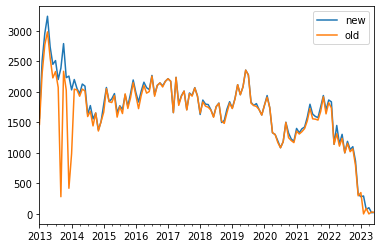

In [35]:
exp.plot()

### comparing TSA flows

In [29]:
def clean_names(str_list):
    new_list = []
    for i in range(len(str_list)):
        new_list.append(str_list[i].lower())
        new_list[i] = new_list[i].replace(' ','_')
    return new_list

In [37]:
COUNTRY_LIST = ['United States', 'Canada', 'Mexico','Nigeria', 'Angola', 'Brazil', 'Guyana', 'Colombia', 'Libya', 'Algeria', 'Tunisia', 'Saudi Arabia','United Arab Emirates', 'Iraq', 'Kuwait', 'Iran', 'Egypt','Russian Federation']
SUBCONTINENT_LIST = ['Western Africa', 'South America', 'Northern America']
clean_ctry_list = clean_names(COUNTRY_LIST)
clean_sub_list = clean_names(SUBCONTINENT_LIST)

In [100]:
def compare_flows(url):
    previous = tsa.get(url, revision_date=dt(2023,1,7))
    latest = tsa.get(url)
    diff = pd.concat([previous, latest], axis=1)
    diff.columns = ['ADI','BO']
    return diff

In [5]:
urls = [
    "crude.kpler.oecd_europe.exports.kbd.daily",
    'crude.kpler.oecd_europe.exports.kbd.monthly',
    'crude.kpler.cpc.oecd_europe.imports.kbd.monthly',
    'crude.kpler.cpc.oecd_europe.imports.kbd.daily',
    'crude.kpler.ceyhan.oecd_europe.imports.kbd.monthly',
    'crude.kpler.ceyhan.oecd_europe.imports.kbd.daily',
    'crude.kpler.ceyhan.exports.kbd.daily'
]

In [39]:
russia = compare_flows(url='crude.kpler.russian_federation.oecd_europe.imports.kbd.monthly')

In [42]:
russia.tail(20)

ADI           BO
2021-11-01  1917.662033  1917.662033
2021-12-01  1637.960774  1637.960774
2022-01-01  1820.535419  1820.535419
2022-02-01  1735.126929  2266.838179
2022-03-01  1139.637613  2033.605645
2022-04-01  1312.609833  2116.063667
2022-05-01  1109.615548  1969.341516
2022-06-01  1237.286300  1929.169367
2022-07-01  1000.145903  1768.195903
2022-08-01  1153.575903  1774.496194
2022-09-01  1018.415100  1716.781300
2022-10-01  1032.741839  1544.722484
2022-11-01   828.919333  1426.482033
2022-12-01   296.720097  1254.564645
2023-01-01   149.056806  1194.892548
2023-02-01    81.000786  1217.057321
2023-03-01     0.000000   125.697290
2023-04-01    33.577733   121.358233
2023-05-01     0.000000     0.000000
2023-06-01    25.044133    23.936500

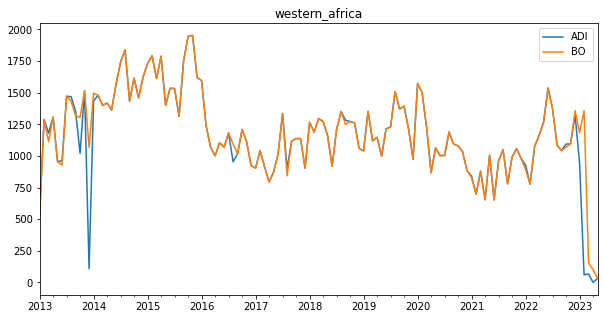

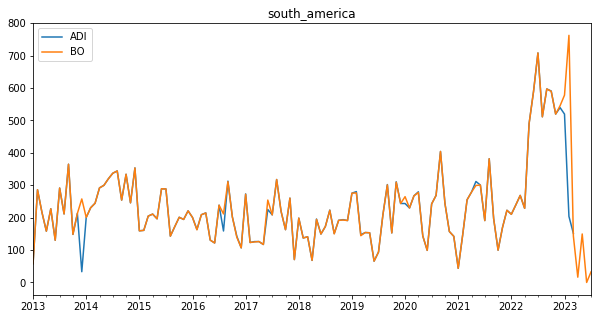

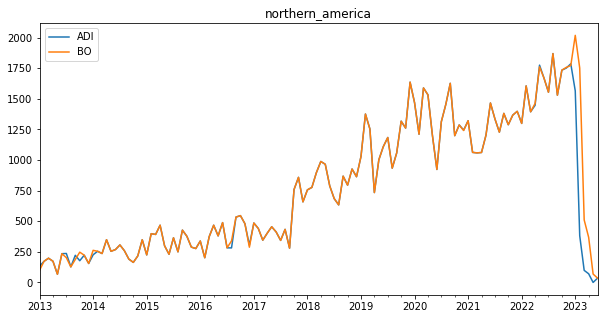

In [102]:
for c in clean_sub_list:
    compare_flows(url=f'crude.kpler.{c}.oecd_europe.imports.kbd.monthly').plot(figsize=(10,5), title=c)

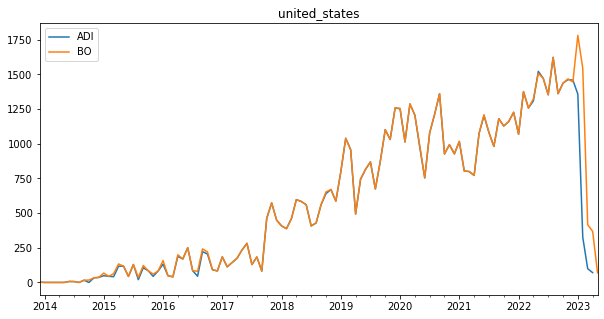

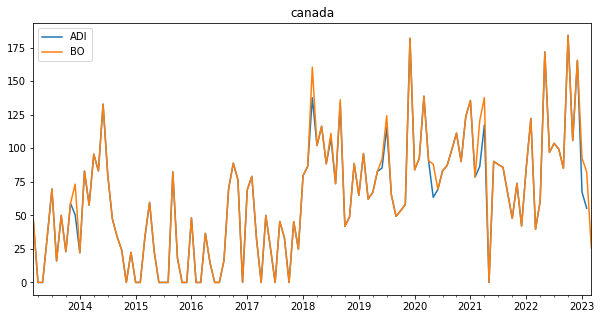

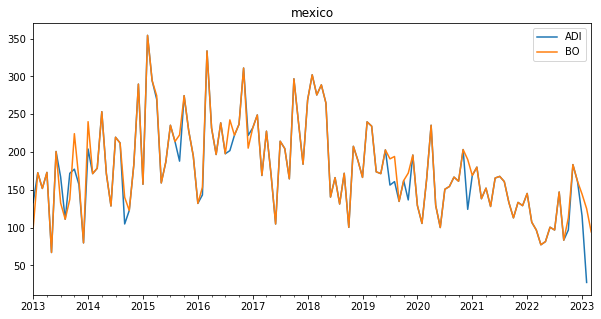

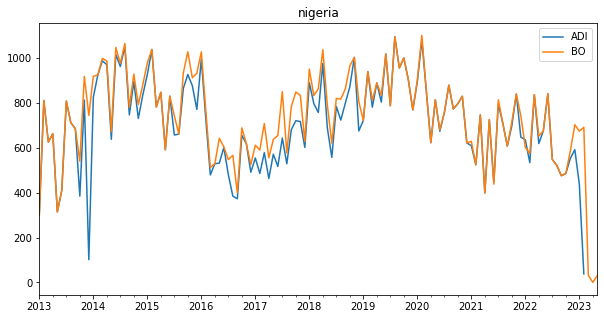

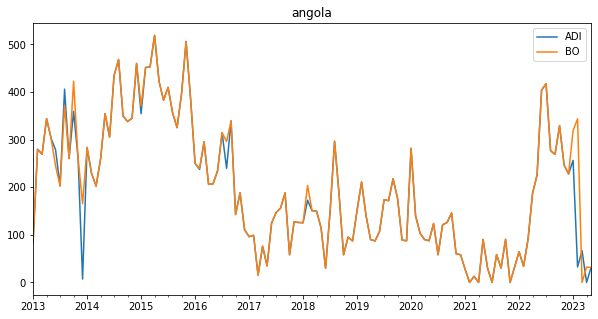

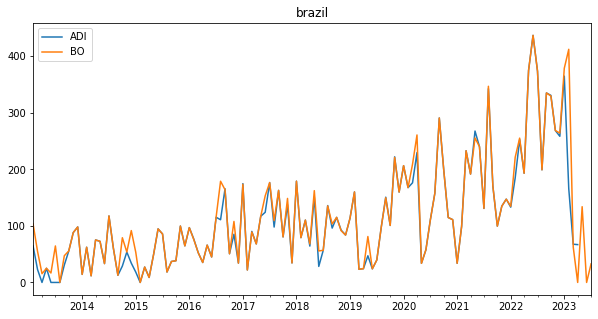

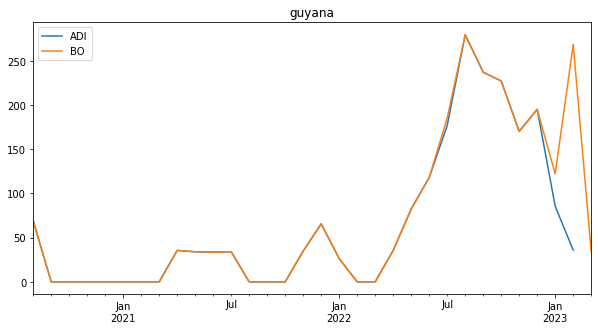

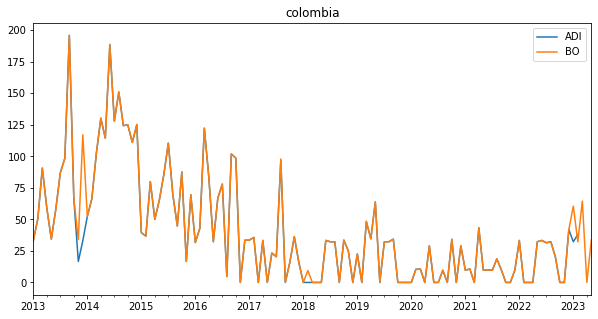

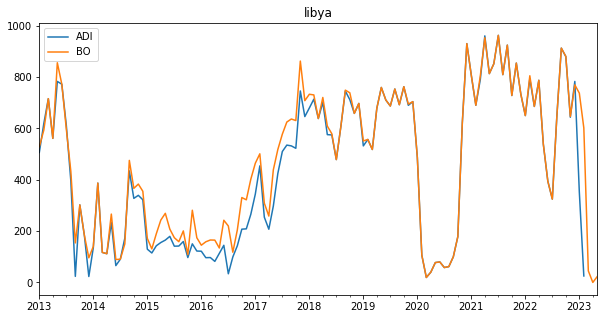

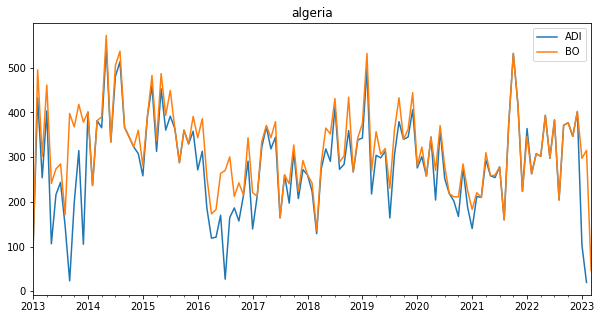

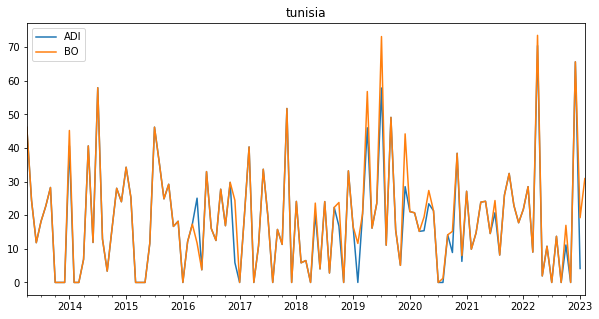

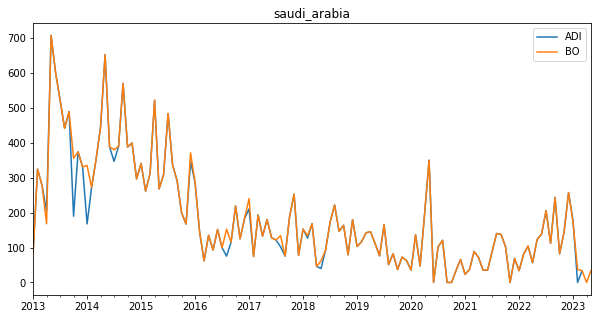

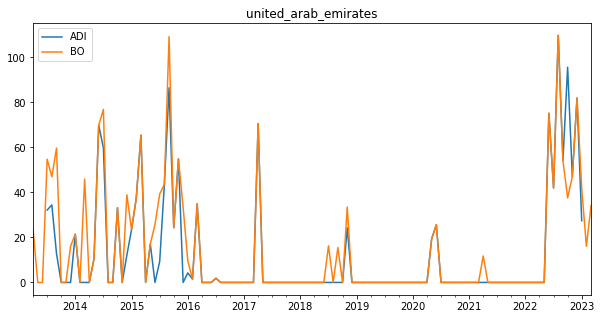

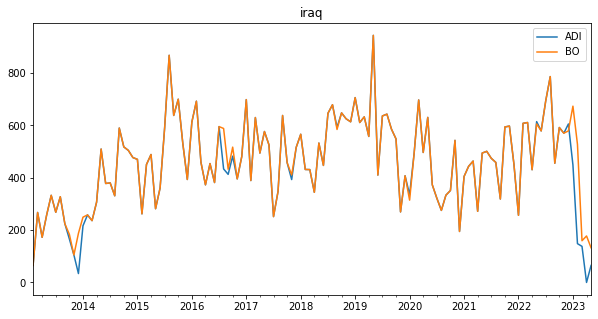

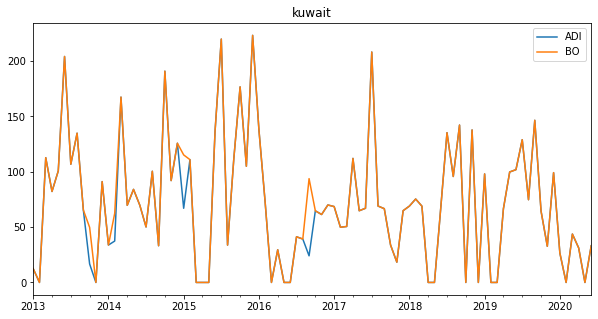

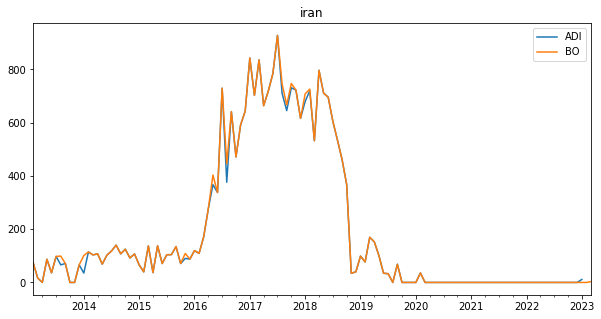

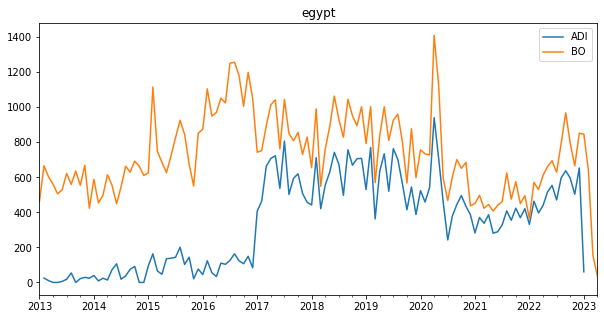

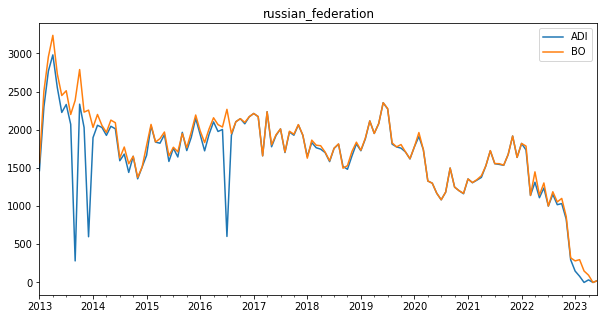

In [101]:
for c in clean_ctry_list:
    compare_flows(url=f'crude.kpler.{c}.oecd_europe.imports.kbd.monthly').plot(figsize=(10,5), title=c)

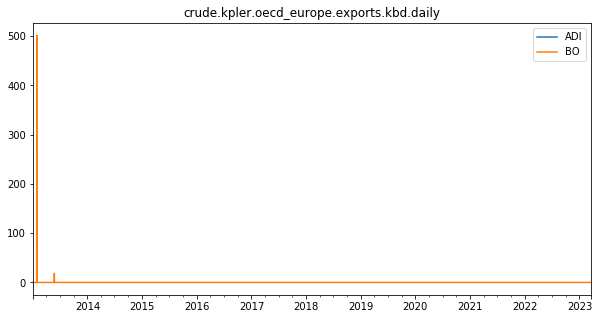

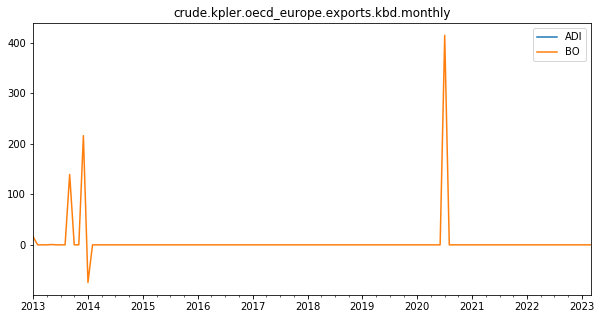

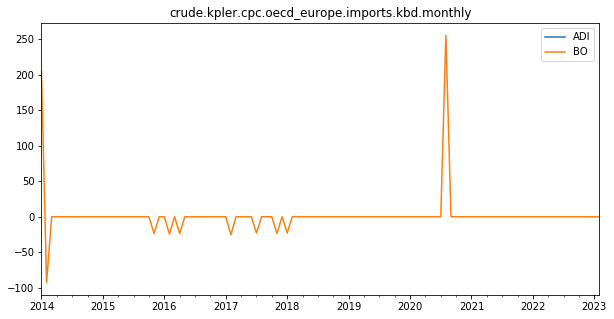

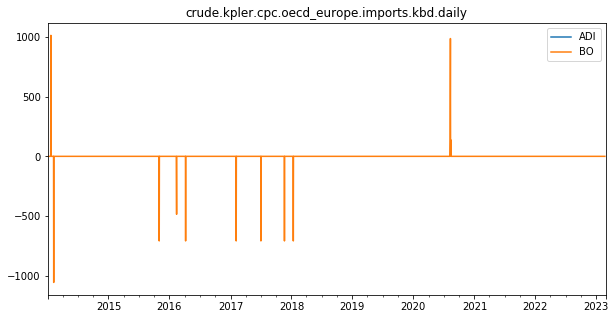

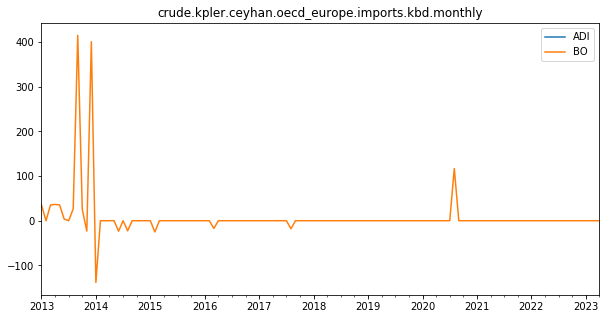

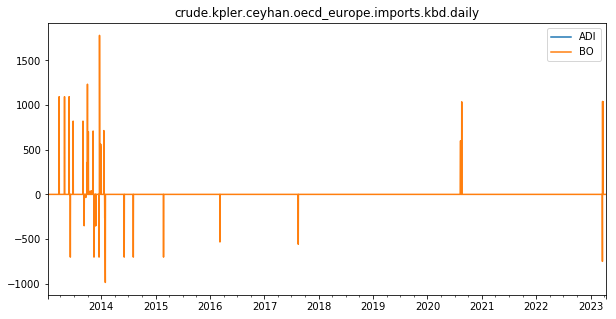

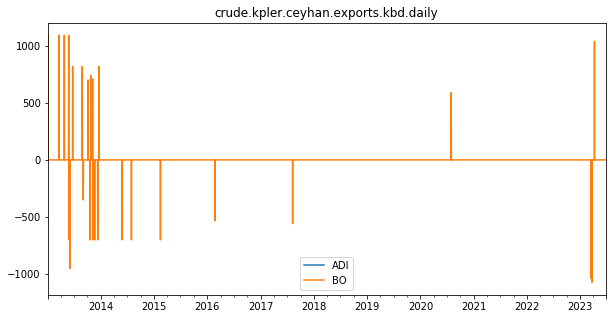

In [7]:
for url in urls:
    compare_flows(url).diff(axis=1).plot(figsize=(10,5), title=url)

<AxesSubplot:>

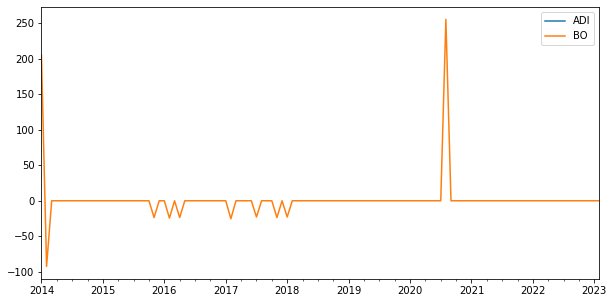

In [10]:
compare_flows('crude.kpler.cpc.oecd_europe.imports.kbd.monthly').diff(axis=1).plot(figsize=(10,5))

In [13]:
last = tsa.get("crude.kpler.ceyhan.oecd_europe.imports.kbd.monthly", revision_date=dt(2023,1,30))
latest = tsa.get("crude.kpler.ceyhan.oecd_europe.imports.kbd.monthly")

In [19]:
diff = pd.concat([last, latest], axis=1)
diff.columns = ['ADI','BO']

<AxesSubplot:>

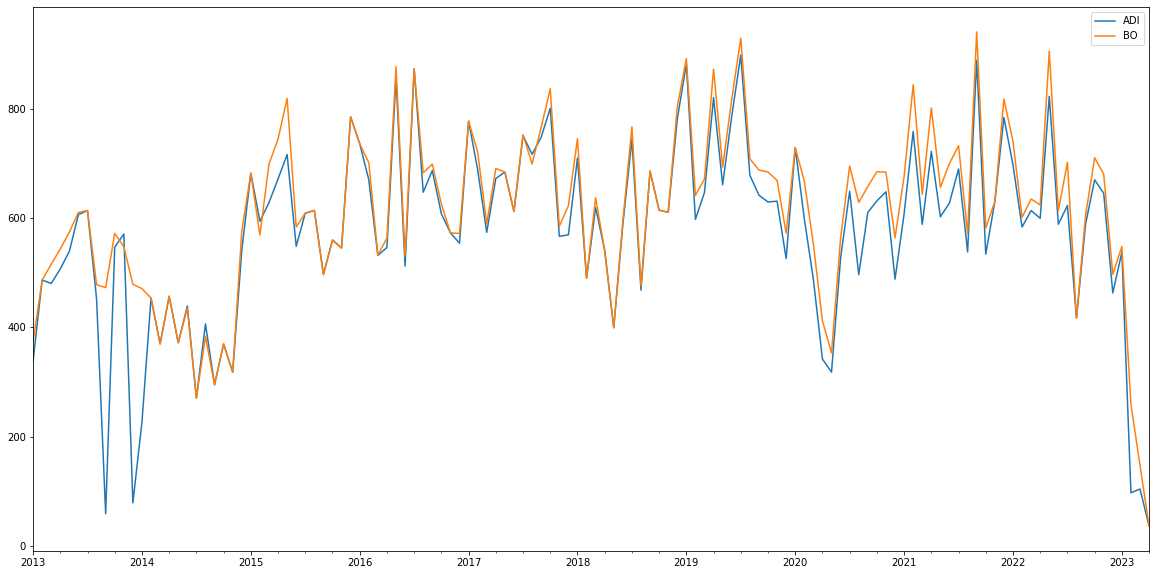

In [20]:
diff.plot(figsize=(20,10))

In [ ]:
# # Press the green button in the gutter to run the script.
# if __name__ == '__main__':
#     ap = DataAccessApi()
#     body = DataCommand(query="select 1")
#     response = ap.generic_data_get_generic_data(body)
#     print(response)

In [ ]:
# api = DataAccessApi()
# body = DataCommand(query=ceyhan_qry)
# response = api.generic_data_get_generic_data(body)
# data = pd.DataFrame.from_records(response)

<RetryCallState 2040373188064: attempt #1; slept for 0.0; last result: none yet>
client id not detected, trying to fetch credential from browser or cache
token will be aquired interactively
